In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [19]:
data = pd.read_csv("Datasets/Metadata_of_Kaggle dataset/data.csv")
data.head()

,DataSetMedals,ct,dataUrl,totalviews,votecount,medalvotecount,totaldownloads,totalkernel,title,description,key,license
0,silver,2015-12-09 06:16:00,benhamner/nips-2015-papers,69099,96,29,4466,80,NIPS 2015 Papers,[Neural Information Processing Systems (NIPS)]...,"['business', 'linguistics', 'artificial intell...",ODbL-1.0
1,gold,2016-02-19 06:37:00,benhamner/2016-us-election,233338,513,90,25261,259,2016 US Election,This contains data relevant for the 2016 US Pr...,"['earth and nature', 'politics', 'computer sci...",CC-BY-NC-SA-4.0
2,silver,2016-03-08 22:41:02,seanlahman/the-history-of-baseball,63116,254,47,9294,143,The History of Baseball,Baffled why your team traded for that 34-year-...,"['baseball', 'history']",CC-BY-SA-3.0
3,gold,2016-03-09 04:10:56,mylesoneill/world-university-rankings,335275,893,158,60607,487,World University Rankings,"Of all the universities in the world, which ar...",['universities and colleges'],copyright-authors
4,bronze,2016-03-16 00:00:00,wcukierski/2016-march-ml-mania,18782,58,16,1895,73,2016 March ML Mania Predictions,Kaggle’s [March Machine Learning Mania](https:...,"['games', 'basketball', 'artificial intelligen...",CC-BY-NC-SA-4.0


# First View Of Data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42955 entries, 0 to 42954
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DataSetMedals   42955 non-null  object
 1   ct              42955 non-null  object
 2   dataUrl         42955 non-null  object
 3   totalviews      42955 non-null  int64 
 4   votecount       42955 non-null  int64 
 5   medalvotecount  42955 non-null  int64 
 6   totaldownloads  42955 non-null  int64 
 7   totalkernel     42955 non-null  int64 
 8   title           42955 non-null  object
 9   description     20341 non-null  object
 10  key             42955 non-null  object
 11  license         42955 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.9+ MB


# Feature Engineering

## Checking if ther are any Null Values in Numerical Features

In [21]:
num_categories = [feature for feature in data.columns if data[feature].dtypes != "O"] # here "O" basically means object which represents string values
data[num_categories].isnull().sum()

totalviews        0
votecount         0
medalvotecount    0
totaldownloads    0
totalkernel       0
dtype: int64

## Checking if ther are any Null Values in Categorical Features

In [22]:
cat_categories = [feature for feature in data.columns if data[feature].dtypes == "O"]
data[cat_categories].isnull().sum()

DataSetMedals        0
ct                   0
dataUrl              0
title                0
description      22614
key                  0
license              0
dtype: int64

### Arround 50% of the Description Data is missing but in my knowledge we dont Need Description Column so i will completely remove it.

In [23]:
data = data.drop(columns="description")

### Slicing the **ct** Column and making 3 new Columns ["year", "month", "time"] so that we can use this Later in EDA Part.            

In [24]:
data[['year','month','time']] = data['ct'].str.split('-',expand=True)
data.head()

,DataSetMedals,ct,dataUrl,totalviews,votecount,medalvotecount,totaldownloads,totalkernel,title,key,license,year,month,time
0,silver,2015-12-09 06:16:00,benhamner/nips-2015-papers,69099,96,29,4466,80,NIPS 2015 Papers,"['business', 'linguistics', 'artificial intell...",ODbL-1.0,2015,12,09 06:16:00
1,gold,2016-02-19 06:37:00,benhamner/2016-us-election,233338,513,90,25261,259,2016 US Election,"['earth and nature', 'politics', 'computer sci...",CC-BY-NC-SA-4.0,2016,02,19 06:37:00
2,silver,2016-03-08 22:41:02,seanlahman/the-history-of-baseball,63116,254,47,9294,143,The History of Baseball,"['baseball', 'history']",CC-BY-SA-3.0,2016,03,08 22:41:02
3,gold,2016-03-09 04:10:56,mylesoneill/world-university-rankings,335275,893,158,60607,487,World University Rankings,['universities and colleges'],copyright-authors,2016,03,09 04:10:56
4,bronze,2016-03-16 00:00:00,wcukierski/2016-march-ml-mania,18782,58,16,1895,73,2016 March ML Mania Predictions,"['games', 'basketball', 'artificial intelligen...",CC-BY-NC-SA-4.0,2016,03,16 00:00:00


# EDA for The Dataset

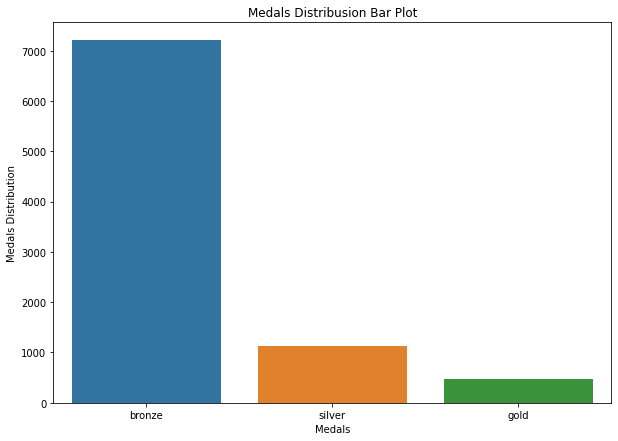

In [25]:
medal_distribution = data["DataSetMedals"].value_counts()[1:].reset_index()

plt.figure(figsize=(10,7))
sns.barplot(x="index" ,y="DataSetMedals" ,data=medal_distribution)
plt.title("Medals Distribusion Bar Plot")
plt.xlabel("Medals")
plt.ylabel("Medals Distribution")
#plt.xticks(rotation=90)
plt.show()

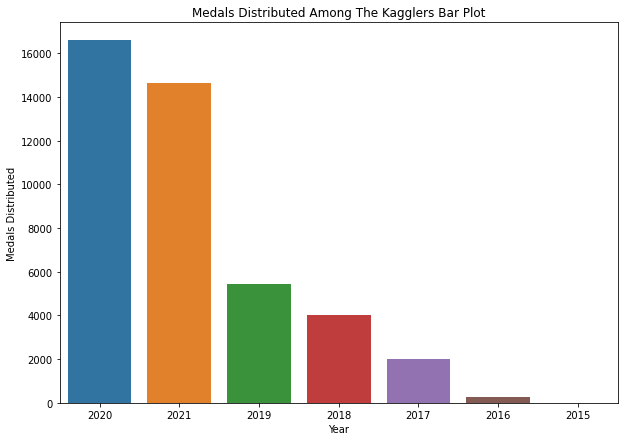

In [26]:
year_plot = data["year"].value_counts().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(x="index" ,y="year" ,data=year_plot)
plt.title("Medals Distributed Among The Kagglers Bar Plot")
plt.xlabel("Year")
plt.ylabel("Medals Distributed")
#plt.xticks(rotation=90)
plt.show()

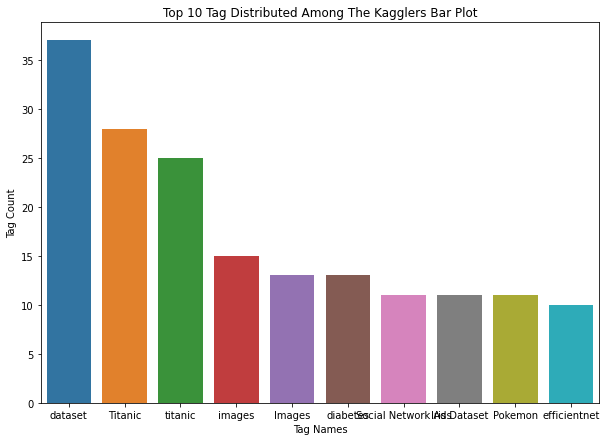

In [27]:
top10_titles = data["title"].value_counts().head(10).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="index" ,y="title" ,data=top10_titles)
plt.title("Top 10 Tag Distributed Among The Kagglers Bar Plot")
plt.xlabel("Tag Names")
plt.ylabel("Tag Count")
#plt.xticks(rotation=90)
plt.show()

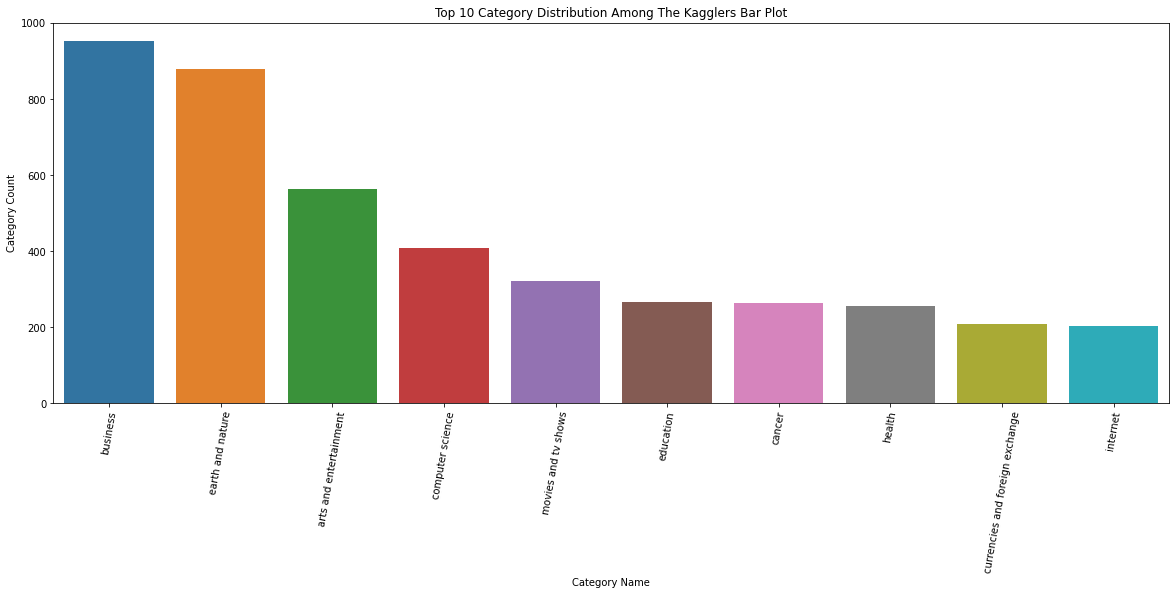

In [28]:
top10_category = data["key"].value_counts()[1:].head(10).reset_index()
top10_category["index"] = top10_category["index"].str.replace("[", "", regex=True).replace("]", "", regex=True).replace("'", "", regex=True)

plt.figure(figsize=(20,7))
sns.barplot(x="index" ,y="key" ,data=top10_category)
plt.title("Top 10 Category Distribution Among The Kagglers Bar Plot")
plt.xlabel("Category Name")
plt.ylabel("Category Count")
plt.xticks(rotation=80)
plt.show()


# Results Of **EDA**

#### 1) According to the Medal Distribution bar plot Most of the users Got Bronze Medal than Silver and Gold.
#### 2) According to the Data Year 2020 was the time when The users were wost active and so the Medal Created/Distributed in large numbers and second place comes 2021.
#### 3) According to the Data the most trending Title Tags are **Dataset** and **Titanic**.
#### 4) According to the Data the most Common Categories in which Most of the Medals were Distributed Are Business,  Earth and Temperature, Art and Entertainment.

### So in order to get the Maximum Numbers of Medals you Should use Tags like **Dataset** and **Titanic** wherever possible. And you can try to Create more Kernal, Datasets or take part in Competition which falls in the Category of **Business**, **Earth and Temperature**, **Art and Entertainment** Because these Are *Hot Topics*.


## Author

- [@everydaycodings(Kaggle)](https://www.kaggle.com/everydaycodings)
- [@everydaycodings(Github)](https://github.com/everydaycodings)

#### If You Lived this Kernal, Please Don't Forget To Give a UP Vote To It, This keeps me motivated to Make more Such Kernels. 